In [1]:
import numpy as np
#import h5py
#f = h5py.File('EP1.mat','r')
#data = f.get('data/variable1')
#data = np.array(data) # For converting to a NumPy array


In [6]:
import scipy.io
import glob

mat_paths = glob.glob('/work/users/mi186veva/data_bea/*.mat')
for mat_path in mat_paths:
    print(mat_path)
    mat = scipy.io.loadmat(mat_path)
    print(np.unique(mat['gtMap']))


/work/users/mi186veva/data_bea/EP4.mat
[0 1 2 3]
/work/users/mi186veva/data_bea/EP3.mat
[0 1 2 3]
/work/users/mi186veva/data_bea/EP10.mat
[0 1 2 3]
/work/users/mi186veva/data_bea/EP2.mat
[0 1 2]
/work/users/mi186veva/data_bea/EP5.mat
[0 1 2 3]
/work/users/mi186veva/data_bea/EP6.mat
[0 1 2 3]
/work/users/mi186veva/data_bea/EP1.mat
[0 1 2 3]
/work/users/mi186veva/data_bea/EP8.mat
[0 1 3]
/work/users/mi186veva/data_bea/EP9.mat
[0 1 2 3]
/work/users/mi186veva/data_bea/EP7.mat
[0 1 2 3]


In [4]:
np.unique(mat['gtMap'])

array([0, 1, 2, 3], dtype=uint8)

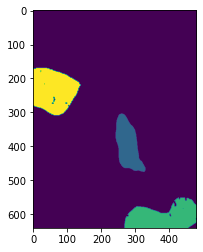

In [9]:
import matplotlib.pyplot as plt
plt.imshow(mat['gtMap'])

In [7]:
import glob
import os
import numpy as np
from sklearn import preprocessing
from keras.utils import np_utils

preffix = '/work/users/mi186veva/'
paths_raw = glob.glob(os.path.join(preffix, 'data_bea/raw_3d/shuffled', '*.npz'))

for path_raw in paths_raw[:2]:
    data = np.load(path_raw)
    names = data['PatientName']
    y = data['y']
    print(data['y'].shape)
    print(data['X'].shape)
    print(y[:50])
    
    #y = preprocessing.OneHotEncoder().fit_transform(np.expand_dims(y, axis=0))
    
    y = np.eye(3)[y]#np_utils.to_categorical(y)
    
    print(y.shape)
    print(y[:50])
    
    
    
    print(np.unique(names))
    
paths_b = glob.glob(os.path.join(preffix, 'data_bea/raw_3d/batch_sized', '*.npz'))

for path_b in paths_b[:2]:
    data = np.load(path_b, allow_pickle=True)
    names = data['PatientName']
    y = data['y']
    
    print(y[:3])
    print(np.unique(names))
    #for key, value in data.items() :
    #    print (key)

(30555,)
(30555, 5, 5, 81)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2
 0 2 2 0 2 2 2 2 2 2 2 2 2]
(30555, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
['EP1' 'EP10' 'EP2' 'EP3' 'EP4' 'EP5' 'EP6' 'EP7' 'EP8' 'EP9']
(30649,)
(30649, 5, 5, 81)
[2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 0 2 2 2 2 0 1 0 0 2 2 2 2]
(30649, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0

In [11]:
data = np.load('/work/users/mi186veva/data_bea/raw_3d/batch_sized/batch11270.npz')
X, y = data['X'], data['y']

print(X.shape, y.shape)

summ_ill = np.where(data['y'][..., 1] == 1)[0].shape[0]
summ_healthy = np.where(data['y'][..., 0] == 1)[0].shape[0]
summ_margin = np.where(data['y'][..., 2] == 1)[0].shape[0]

print(summ_healthy, summ_ill, summ_margin)

(100, 5, 5, 81) (100, 3)
20 2 78


In [2]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report 
import numpy as np

def sensitivity(y_true,y_pred):
    cm=confusion_matrix(y_true, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    Sensitivity = TP/(TP+FN)    
    return Sensitivity#, np.mean(Sensitivity)

def specificity(y_true,y_pred):
    cm=confusion_matrix(y_true, y_pred)
    print('Confusion matrix')
    print(cm)

    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    Specificity = TN/(TN+FP)    
    return Specificity#, np.mean(Specificity)




pred = np.round([0.1, 0.1, 0.1, 0.1, 1.])
gt = np.round([0., 1., 2., 1., 0.])

print(gt, pred)

print(sensitivity(gt, pred))
print(specificity(gt, pred))
print(recall_score(gt, pred, average=None))

[0. 1. 2. 1. 0.] [0. 0. 0. 0. 1.]
[0.5 0.  0. ]
Confusion matrix
[[1 1 0]
 [2 0 0]
 [1 0 0]]
[0.         0.66666667 1.        ]
[0.5 0.  0. ]


In [5]:
from tqdm import tqdm
import csv
import datetime


with open('metrics_by_checkpoint_sample_weights2_d20_true.csv', 'w', newline='') as csvfile:
    fieldnames = ['time', 'checkpoint', 'sensitivity_mean', 'specificity_mean', 'sensitivity_median', 'specificity_median']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writerow({'time':'Time',
                     'checkpoint':'Checkpoint',
                     'sensitivity_mean':'sensitivity_mean',
                     'specificity_mean':'specificity_mean', 
                     'sensitivity_median':'sensitivity_median',
                     'specificity_median':'specificity_median'})
    
    for cp in tqdm(np.linspace(2, 20, 10)):
        print('-----------------Checkpoint: '+str(cp)+'------------------- ')
        cp = int(cp)

        gt_s = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/CV_3d_bea_sample_weights2_d20_true/'+f'cp-{cp:04d}'+'/gt_by_patient.npy',
                      allow_pickle=True)
        pred_s = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/CV_3d_bea_sample_weights2_d20_true/'+f'cp-{cp:04d}'+'/predictions_by_patient.npy',
                        allow_pickle=True)

        sensitivities = []
        specificities = []

        for i in [0, 1, 3, 4, 5, 6, 7, 9]:
            print('Number', i+1)
            gt = np.array(gt_s[i])
            print('gt', gt.shape, np.unique(gt), gt.dtype)
            pred = np.array(pred_s[i])
            pred = np.argmax(pred, axis=1)
            #print(pred.shape, np.unique(pred), pred.dtype)

            spec = specificity(gt, pred)
            sens = sensitivity(gt, pred)

            sensitivities.append(sens)
            specificities.append(spec)

            print('Specificity', spec)
            print('Sensitivity', sens)

            print('------')

        sensitivity_median = np.nanmedian(sensitivities, axis=0)
        specificity_median = np.nanmedian(specificities, axis=0)
        sensitivity_mean = np.nanmean(sensitivities, axis=0)
        specificity_mean = np.nanmean(specificities, axis=0)


        

        writer.writerow({'time':datetime.datetime.now().strftime("%d.%m.%Y %H:%M:%S"),
                         'checkpoint':str(cp),
                         'sensitivity_mean':str(sensitivity_mean),
                         'specificity_mean':str(specificity_mean), 
                         'sensitivity_median':str(sensitivity_median),
                         'specificity_median':str(specificity_median)})



  0%|          | 0/10 [00:00<?, ?it/s]

-----------------Checkpoint: 2.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[12344   279   206]
 [ 4457  3331   923]
 [ 6009     0  8191]]
Specificity [0.54318886 0.98967775 0.94758589]
Sensitivity [0.96219503 0.38239008 0.57683099]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[41650 14282  3774]
 [   11  1437    60]
 [    8     2 27091]]
Specificity [0.99933587 0.83545106 0.93736727]
Sensitivity [0.69758483 0.95291777 0.99963101]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6064 1636 1030]
 [  12  761  139]
 [  13  148 4384]]
Specificity [0.99541873 0.86561205 0.87875959]
Sensitivity [0.69461627 0.83442982 0.96457646]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14401     0     0]
 [ 3700   126     0]
 [ 8500  1220 18582]]
Specificity [0.62026892 0.97143058 1.        ]
Sensitivity [1.         0.03293257 0.65656137]
------
Number 6
gt (47930,) [0 1 2] int64
Confusion matrix
[[22398   436    51]
 [ 1039  8447  

 10%|█         | 1/10 [00:02<00:22,  2.49s/it]

Specificity [0.98707676 0.88591838 0.96570491]
Sensitivity [0.56247241 0.8998513  0.96511777]
------
-----------------Checkpoint: 4.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[12028   459   342]
 [ 3678  3096  1937]
 [  454     0 13746]]
Specificity [0.81964995 0.98301824 0.89419684]
Sensitivity [0.93756333 0.3554127  0.96802817]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[33709 25538   459]
 [   16  1492     0]
 [  131     9 26961]]
Specificity [0.99486176 0.70570346 0.99250172]
Sensitivity [0.56458312 0.98938992 0.99483414]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6179 2302  249]
 [  11  829   72]
 [ 155  233 4157]]
Specificity [0.96958036 0.80903955 0.96670815]
Sensitivity [0.70778923 0.90899123 0.91463146]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14401     0     0]
 [ 3455   371     0]
 [ 4278  1423 22601]]
Specificity [0.75930652 0.96667681 1.        ]
Sensitivity [1.         0.09696811 0.7985

 20%|██        | 2/10 [00:05<00:21,  2.70s/it]

Confusion matrix
[[18757  4857  1301]
 [ 1301 22488  3111]
 [  543  1554 91561]]
Specificity [0.98470446 0.94593204 0.91485091]
Sensitivity [0.75283965 0.83598513 0.97761003]
------
-----------------Checkpoint: 6.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[11920   616   293]
 [ 2212  3657  2842]
 [  325     0 13875]]
Specificity [0.88926716 0.97720966 0.85445682]
Sensitivity [0.92914491 0.41981403 0.97711268]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[37725 21586   395]
 [   11  1497     0]
 [  202     7 26892]]
Specificity [0.99255479 0.75125278 0.99354723]
Sensitivity [0.63184605 0.99270557 0.99228811]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6154 2371  205]
 [  23  823   66]
 [ 289  286 3970]]
Specificity [0.94282573 0.79984934 0.9718938 ]
Sensitivity [0.70492554 0.90241228 0.87348735]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14388    13     0]
 [ 2803  1023     0]
 [ 3237  1640 23425]]
Specifi

 30%|███       | 3/10 [00:08<00:19,  2.78s/it]

Confusion matrix
[[18705  5321   889]
 [ 1628 23026  2246]
 [  142   856 92660]]
Specificity [0.98531827 0.94790551 0.93949628]
Sensitivity [0.75075256 0.85598513 0.98934421]
------
-----------------Checkpoint: 8.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[12287   459    83]
 [ 3594  4465   652]
 [  350     0 13850]]
Specificity [0.82785562 0.98301824 0.96587744]
Sensitivity [0.95775197 0.51257031 0.97535211]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[37043 22294   369]
 [   10  1498     0]
 [  134    11 26956]]
Specificity [0.99496662 0.74305068 0.99397197]
Sensitivity [0.62042341 0.9933687  0.99464964]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6444 2088  198]
 [  56  785   71]
 [ 422  238 3885]]
Specificity [0.91240608 0.82478343 0.97210122]
Sensitivity [0.73814433 0.86074561 0.85478548]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14357    44     0]
 [ 3131   634    61]
 [ 5098  1216 21988]]
Specifi

 40%|████      | 4/10 [00:10<00:16,  2.70s/it]

Confusion matrix
[[17464  4734  2717]
 [ 1525 23142  2233]
 [   97   751 92810]]
Specificity [0.98654589 0.95374158 0.90446782]
Sensitivity [0.70094321 0.8602974  0.99094578]
------
-----------------Checkpoint: 10.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[12125   412   292]
 [ 2929  3953  1829]
 [  288     0 13912]]
Specificity [0.8595871  0.98475711 0.90153203]
Sensitivity [0.94512433 0.45379405 0.97971831]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[37889 21395   422]
 [    6  1502     0]
 [  265     8 26828]]
Specificity [0.99052746 0.75344154 0.99310615]
Sensitivity [0.63459284 0.99602122 0.98992657]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[7043 1575  112]
 [  87  766   59]
 [ 581  246 3718]]
Specificity [0.87758842 0.86282486 0.98226509]
Sensitivity [0.8067583  0.83991228 0.8180418 ]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14400     1     0]
 [ 2901   925     0]
 [ 2999   920 24383]]
Specif

 50%|█████     | 5/10 [00:13<00:13,  2.65s/it]

Confusion matrix
[[15561  3659  5695]
 [ 1563 21455  3882]
 [   78   467 93113]]
Specificity [0.98638829 0.96520287 0.81516935]
Sensitivity [0.62456352 0.79758364 0.99418096]
------
-----------------Checkpoint: 12.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[11597   532   700]
 [ 1585  3597  3529]
 [  192     0 14008]]
Specificity [0.922439   0.98031744 0.8036676 ]
Sensitivity [0.90396757 0.41292619 0.98647887]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[44527 14960   219]
 [   12  1496     0]
 [  289    28 26784]]
Specificity [0.98947884 0.82734111 0.99642239]
Sensitivity [0.74577094 0.99204244 0.98830301]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6893 1705  132]
 [  96  755   61]
 [ 574  265 3706]]
Specificity [0.87722192 0.85160075 0.97998341]
Sensitivity [0.78957617 0.82785088 0.81540154]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14401     0     0]
 [ 3019   789    18]
 [ 2888   156 25258]]
Specif

 60%|██████    | 6/10 [00:16<00:10,  2.68s/it]

Confusion matrix
[[13544  3240  8131]
 [ 1209 20759  4932]
 [   46   322 93290]]
Specificity [0.98959007 0.96995943 0.74789154]
Sensitivity [0.54360827 0.77171004 0.99607081]
------
-----------------Checkpoint: 14.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[11661   637   531]
 [ 2985  4150  1576]
 [  236     0 13964]]
Specificity [0.85941251 0.97643272 0.90218199]
Sensitivity [0.90895627 0.47640914 0.98338028]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[41255 17938   513]
 [    2  1506     0]
 [  208    12 26881]]
Specificity [0.99265965 0.79321944 0.99161956]
Sensitivity [0.69096908 0.99867374 0.99188222]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[7081 1543  106]
 [ 118  738   56]
 [ 751  300 3494]]
Specificity [0.84075499 0.86116761 0.98319851]
Sensitivity [0.81111111 0.80921053 0.76875688]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14401     0     0]
 [ 2740  1036    50]
 [ 2654    35 25613]]
Specif

 70%|███████   | 7/10 [00:18<00:08,  2.67s/it]

Confusion matrix
[[11937  5659  7319]
 [ 1066 18677  7157]
 [   41   139 93478]]
Specificity [0.9908177  0.95110185 0.72062144]
Sensitivity [0.47910897 0.69431227 0.99807811]
------
-----------------Checkpoint: 16.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[11350   607   872]
 [ 1754  3293  3664]
 [  220     1 13979]]
Specificity [0.91384051 0.97750564 0.78941504]
Sensitivity [0.88471432 0.37802778 0.98443662]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[41761 17626   319]
 [    1  1507     0]
 [  161    38 26902]]
Specificity [0.99433745 0.79651411 0.99478877]
Sensitivity [0.69944394 0.99933687 0.9926571 ]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6744 1872  114]
 [ 114  743   55]
 [ 646  276 3623]]
Specificity [0.86072934 0.83819209 0.98247252]
Sensitivity [0.77250859 0.81469298 0.79713971]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14400     1     0]
 [ 3036   758    32]
 [ 2798   149 25355]]
Specif

 80%|████████  | 8/10 [00:21<00:05,  2.63s/it]

Confusion matrix
[[16288  4041  4586]
 [ 1657 21152  4091]
 [  115   275 93268]]
Specificity [0.98530168 0.96360048 0.83253884]
Sensitivity [0.65374273 0.7863197  0.99583591]
------
-----------------Checkpoint: 18.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[11576   596   657]
 [ 2411  4763  1537]
 [  380     0 13820]]
Specificity [0.87818079 0.97794961 0.89814299]
Sensitivity [0.90233066 0.54677993 0.97323944]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[38737 20830   139]
 [    0  1508     0]
 [  105     8 26988]]
Specificity [0.99632983 0.75995023 0.99772928]
Sensitivity [0.64879577 1.         0.99583041]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6180 2477   73]
 [ 110  759   43]
 [ 530  432 3583]]
Specificity [0.88271944 0.78086629 0.9879693 ]
Sensitivity [0.70790378 0.83223684 0.78833883]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14397     4     0]
 [ 2500  1202   124]
 [ 1831    28 26443]]
Specif

 90%|█████████ | 9/10 [00:23<00:02,  2.64s/it]

Confusion matrix
[[12089  5405  7421]
 [ 1035 20535  5330]
 [   58   278 93322]]
Specificity [0.99093382 0.95207172 0.75391296]
Sensitivity [0.48520971 0.7633829  0.99641248]
------
-----------------Checkpoint: 20.0------------------- 
Number 1
gt (35740,) [0 1 2] int64
Confusion matrix
[[11567   452   810]
 [ 2706  3364  2641]
 [  236     1 13963]]
Specificity [0.87159007 0.98324022 0.83978644]
Sensitivity [0.90162912 0.3861784  0.98330986]
------
Number 2
gt (88315,) [0 1 2] int64
Confusion matrix
[[43900 15660   146]
 [    1  1507     0]
 [  199    29 26873]]
Specificity [0.99300919 0.81926573 0.99761492]
Sensitivity [0.73526949 0.99933687 0.99158703]
------
Number 4
gt (14187,) [0 1 2] int64
Confusion matrix
[[6685 1864  181]
 [ 122  732   58]
 [ 456  279 3810]]
Specificity [0.894081   0.83856874 0.97521261]
Sensitivity [0.76575029 0.80263158 0.83828383]
------
Number 5
gt (46529,) [0 1 2] int64
Confusion matrix
[[14394     0     7]
 [ 2718  1082    26]
 [ 2134    16 26152]]
Specif

100%|██████████| 10/10 [00:26<00:00,  2.67s/it]

Confusion matrix
[[16644  4369  3902]
 [ 1700 19641  5559]
 [  104   280 93274]]
Specificity [0.98503625 0.96079209 0.81740809]
Sensitivity [0.66803131 0.7301487  0.99589998]
------


In [6]:
from tqdm import tqdm
import csv
import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report 
import numpy as np

    
#for cp in tqdm(np.linspace(2, 20, 10)):
for cp in [20]:
    print('-----------------Checkpoint: '+str(cp)+'------------------- ')
    cp = int(cp)

    gt_s = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/CV_3d_every_third/'+f'cp-{cp:04d}'+'/gt_by_patient.npy',
                  allow_pickle=True)
    pred_s = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/CV_3d_every_third/'+f'cp-{cp:04d}'+'/predictions_by_patient.npy',
                    allow_pickle=True)

    sensitivities = []
    specificities = []

    for i in range(10):
        print('Number', i+1)
        gt = np.array(gt_s[i])
        print('gt', gt.shape, np.unique(gt), gt.dtype)
        pred = np.rint(np.array(pred_s[i]))
        predictions = np.array(np.array(pred_s[i]) > 0.5).astype(np.uint8)
        #print('pred', pred.shape, np.unique(pred), pred.dtype)
        print('predictions', predictions.shape, np.unique(predictions), predictions.dtype)
        
        #pred = np.argmax(pred, axis=1)
        #print(pred.shape, np.unique(pred), pred.dtype)
        
        print(confusion_matrix(gt, pred))

        spec = recall_score(gt, pred, pos_label=0)
        sens = recall_score(gt, pred, pos_label=1)

        sensitivities.append(sens)
        specificities.append(spec)

        print('Specificity', spec)
        print('Sensitivity', sens)

        print('------')

    sensitivity_median = np.nanmedian(sensitivities, axis=0)
    specificity_median = np.nanmedian(specificities, axis=0)
    sensitivity_mean = np.nanmean(sensitivities, axis=0)
    specificity_mean = np.nanmean(specificities, axis=0)

-----------------Checkpoint: 20------------------- 
Number 1
gt (17875,) [0] int64
pred (17875, 1) [0. 1.] float32
predictions (17875, 1) [0 1] uint8
[[14973  2902]
 [    0     0]]
Specificity 0.8376503496503497
Sensitivity 0.0
------
Number 2
gt (119991,) [0 1] int64
pred (119991, 1) [0. 1.] float32
predictions (119991, 1) [0 1] uint8


/nfs/cluster/jupyterlab/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[112785    755]
 [  6407     44]]
Specificity 0.9933503611062181
Sensitivity 0.0068206479615563476
------
Number 3
gt (109920,) [0 1] int64
pred (109920, 1) [0. 1.] float32
predictions (109920, 1) [0 1] uint8
[[109146     20]
 [   754      0]]
Specificity 0.999816792774307
Sensitivity 0.0
------
Number 4
gt (20562,) [0 1] int64
pred (20562, 1) [0. 1.] float32
predictions (20562, 1) [0 1] uint8
[[19226    13]
 [ 1146   177]]
Specificity 0.9993242892042206
Sensitivity 0.13378684807256236
------
Number 5
gt (134402,) [0 1] int64
pred (134402, 1) [0. 1.] float32
predictions (134402, 1) [0 1] uint8
[[115754     15]
 [ 10329   8304]]
Specificity 0.9998704316354119
Sensitivity 0.44566092416680086
------
Number 6
gt (110182,) [0 1] int64
pred (110182, 1) [0. 1.] float32
predictions (110182, 1) [0 1] uint8
[[107072   2443]
 [   667      0]]
Specificity 0.9776925535314797
Sensitivity 0.0
------
Number 7
gt (136193,) [0 1] int64
pred (136193, 1) [0. 1.] float32
predictions (136193, 1) [0 1] uint

In [4]:
arr = np.array([1.1, 1.7])
np.rint(arr)

array([1., 2.])